# Analysis of the U.S. Stock Market during Health Crises
Jupyter Notebook

Authors:
Kush Patel, 
Katherine Thai, 
Jonathan Perez, 
Ron Nathaniel, 
Justin Molina, 
Dhrumil Rana, 

In [1]:
# Necessary imports

import pandas as pd
import numpy as np 
import os.path as path
from datetime import datetime

In [2]:
# Opening CSV files into Pandas DataFrames

dir_data = 'data'
file_spy = 'spy.csv'
file_co = 'crude-oil.csv'
file_gold = 'gold.csv'

spy_df = pd.read_csv(path.join(dir_data, file_spy))
clf_df = pd.read_csv(path.join(dir_data, file_co))
gold_df = pd.read_csv(path.join(dir_data, file_gold))

# Fixing date type/format 
spy_df['Date'] = pd.to_datetime(spy_df.Date, format='%m/%d/%Y')
clf_df['Date'] = pd.to_datetime(clf_df.Date, format='%m/%d/%Y')
gold_df['Date'] = pd.to_datetime(gold_df.Date, format='%m/%d/%Y')

In [3]:
# spy_df.head()
spy_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [4]:
# clf_df.head()
clf_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [5]:
# gold_df.head()
gold_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [70]:
# skipping the headers of each file
rows_to_skip = list(range(0, 6))

dir_sectors = 'data/spy-sectors'

file_HC = 'healthcare.xls'
file_IN = 'industrials.xls'
file_FN = 'financials.xls'
file_EPS = 'eps-estimate.xlsx'
file_MA = 'market-attributes.xlsx'

# skipping the extra footer of each file
healthcare_19_20 = pd.read_excel(path.join(dir_sectors, file_HC), skiprows=rows_to_skip, skipfooter=4)
industrials_19_20 = pd.read_excel(path.join(dir_sectors, file_IN), skiprows=rows_to_skip, skipfooter=4)
financials_19_20 = pd.read_excel(path.join(dir_sectors, file_FN), skiprows=rows_to_skip, skipfooter=4)
eps_est = pd.read_excel(path.join(dir_sectors, file_EPS))
market_attr = pd.read_excel(path.join(dir_sectors, file_MA))

rows_skip = list(range(0,5))
quarterly_data = pd.read_excel(path.join(dir_sectors, file_EPS), sheet_name="QUARTERLY DATA", skiprows=rows_skip)

In [7]:
# healthcare_19_20.head()
healthcare_19_20.dtypes

Effective date                  datetime64[ns]
S&P 500 Health Care (Sector)           float64
dtype: object

In [8]:
# industrials_19_20.head()
industrials_19_20.dtypes

Effective date                  datetime64[ns]
S&P 500 Industrials (Sector)           float64
dtype: object

In [9]:
# financials_19_20.head()
financials_19_20.dtypes

Effective date                 datetime64[ns]
S&P 500 Financials (Sector)           float64
dtype: object

In [73]:
quarterly_data.dtypes

QUARTER END                      datetime64[ns]
OPERATING EARNINGS PER SHR              float64
AS REPORTED EARNINGS PER SHR            float64
CASH DIVIDENDS PER SHR                  float64
SALES PER SHARE                         float64
BOOK VAL PER SHARE                      float64
CAPITAL EXPENDITURE PER SHARE           float64
PRICE                                   float64
DIVISOR                                 float64
dtype: object

In [10]:
# finding empty entries with isna

def find_num_nans(df, string):
    s1 = df.loc[(df[string].isna())]
    return s1.shape[0]

In [11]:
# printing num of empty in spy_df
for column in spy_df:
    print("Checking : spy_df -", column)
    print(find_num_nans(spy_df, column))

Checking : spy_df - Date
0
Checking : spy_df - Open
0
Checking : spy_df - High
0
Checking : spy_df - Low
0
Checking : spy_df - Close
0
Checking : spy_df - Adj Close
0
Checking : spy_df - Volume
0


In [12]:
# printing num of empty in clf_df
for column in clf_df:
    print("Checking : clf_df -", column)
    print(find_num_nans(clf_df, column))

Checking : clf_df - Date
0
Checking : clf_df - Open
0
Checking : clf_df - High
0
Checking : clf_df - Low
0
Checking : clf_df - Close
0
Checking : clf_df - Adj Close
0
Checking : clf_df - Volume
0


In [13]:
# printing num of empty in gold_df
for column in gold_df:
    print("Checking : gold_df -", column)
    print(find_num_nans(gold_df, column))

Checking : gold_df - Date
0
Checking : gold_df - Open
0
Checking : gold_df - High
0
Checking : gold_df - Low
0
Checking : gold_df - Close
0
Checking : gold_df - Adj Close
0
Checking : gold_df - Volume
0


In [14]:
# printing num of empty in healthcare
for column in healthcare_19_20:
    print("Checking : healthcare_19_20 -", column)
    print(find_num_nans(healthcare_19_20, column))

Checking : healthcare_19_20 - Effective date 
0
Checking : healthcare_19_20 - S&P 500 Health Care (Sector)
0


In [15]:
# printing num of empty in industrials
for column in industrials_19_20:
    print("Checking : industrials_19_20 -", column)
    print(find_num_nans(industrials_19_20, column))

Checking : industrials_19_20 - Effective date 
0
Checking : industrials_19_20 - S&P 500 Industrials (Sector)
0


In [16]:
# printing num of empty in financials
for column in financials_19_20:
    print("Checking : financials_19_20 - ", column)
    print(find_num_nans(financials_19_20, column))

Checking : financials_19_20 -  Effective date 
0
Checking : financials_19_20 -  S&P 500 Financials (Sector)
0


In [79]:
for column in quarterly_data:
    print("{} - {} empty cells".format(column, find_num_nans(quarterly_data,column)))

QUARTER END - 0 empty cells
OPERATING EARNINGS PER SHR - 1 empty cells
AS REPORTED EARNINGS PER SHR - 1 empty cells
CASH DIVIDENDS PER SHR - 0 empty cells
SALES PER SHARE - 49 empty cells
BOOK VAL PER SHARE - 48 empty cells
CAPITAL EXPENDITURE PER SHARE - 92 empty cells
PRICE - 0 empty cells
DIVISOR - 0 empty cells


In [17]:
def get_months_mean(dframe, group):
    
    # Grouping healthcare by year and month
    months = dframe.groupby([dframe['Effective date '].dt.year.rename('year'),
                   dframe['Effective date '].dt.month_name().rename('month')])
    
    #  getting mean/average of each month per year
    group = months[group].mean().reset_index()
    
    # Counting how many entries in each month per year
    count = months.size().reset_index(name='count')
    
    return group, count


In [18]:
HC_19_20_months, count = get_months_mean(healthcare_19_20, 'S&P 500 Health Care (Sector)')

HC_19_20_months['count'] = count['count']
HC_19_20_months

,year,month,S&P 500 Health Care (Sector),count
0,2019,December,1170.466667,21
1,2019,November,1116.570500,20
2,2019,October,1075.335556,9
3,2020,April,1117.072381,21
4,2020,August,1243.676667,21
5,2020,February,1180.347895,19
6,2020,January,1195.545714,21
7,2020,July,1212.707727,22
8,2020,June,1167.524091,22
9,2020,March,1025.903636,22


In [19]:
ID_19_20_months, count = get_months_mean(industrials_19_20, 'S&P 500 Industrials (Sector)')

ID_19_20_months['count'] = count['count']
ID_19_20_months

,year,month,S&P 500 Industrials (Sector),count
0,2019,December,683.481429,21
1,2019,November,687.504000,20
2,2019,October,661.018889,9
3,2020,April,517.352857,21
4,2020,August,644.875714,21
5,2020,February,691.087895,19
6,2020,January,701.021905,21
7,2020,July,596.539091,22
8,2020,June,590.113636,22
9,2020,March,523.017727,22


In [20]:
FI_19_20_months, count = get_months_mean(financials_19_20, 'S&P 500 Financials (Sector)')

FI_19_20_months['count'] = count['count']
FI_19_20_months

,year,month,S&P 500 Financials (Sector),count
0,2019,December,505.415238,21
1,2019,November,493.221000,20
2,2019,October,475.448889,9
3,2020,April,361.561429,21
4,2020,August,411.053810,21
5,2020,February,500.585789,19
6,2020,January,508.602857,21
7,2020,July,394.775000,22
8,2020,June,401.248182,22
9,2020,March,368.297273,22


In [21]:
# Adding count column based on year  

# spy_years = spy_df.groupby([spy_df['Date'].dt.year.rename('year')]).size().reset_index(name='count')
# spy_years

In [22]:
# Adding count column based on year 

# clf_years = clf_df.groupby([clf_df['Date'].dt.year.rename('year')]).size().reset_index(name='count')
# clf_years

In [23]:
# Adding count column based on year 

# gold_years = gold_df.groupby([gold_df['Date'].dt.year.rename('year')]).size().reset_index(name='count')
# gold_years

In [24]:
# Finding sum of Close price per year 

# spy_grouped = spy_df.groupby([spy_df['Date'].dt.year.rename('year')])['Close'].sum().reset_index(name='Sum')
# spy_grouped

In [25]:
# Function to find quantiles of given column/data and outliers
def find_quantiles(df, string):
    q25 = df[string].quantile(0.25)
    q25 = q25.round(2)
    q50 = df[string].quantile(0.50)
    q50 = q50.round(2)
    q75 = df[string].quantile(0.75)
    q75 = q75.round(2)
    
    diff = (q75-q25).round(2)
    sample_min = round(df[string].min(),2)
    sample_max = round(df[string].max(),2)
    
    outlier = df.loc[(df[string] < q25 - (1.5 * diff)) | (df[string] > q75 + (1.5* diff))]
    print('There upper and lower quantile of the {} price are ${}, ${} respectively'.format(string, q25, q75))
    print('Range of prices in {} is (${}, ${})'.format(string, sample_min, sample_max))
    print ('There are {} outliers in {}\n'.format(outlier.shape[0], string))
#     if(outlier.shape[0] > 0):
#         print(outlier.head(outlier.shape[0]))

In [26]:
# quantiles and outliers spy_df

find_quantiles(spy_df,'Low')
find_quantiles(spy_df,'High')
find_quantiles(spy_df,'Close')
find_quantiles(spy_df,'Adj Close')
find_quantiles(spy_df,'Volume')

There upper and lower quantile of the Low price are $1146.18, $2056.32 respectively
Range of prices in Low is ($666.79, $3284.53)
There are 0 outliers in Low

There upper and lower quantile of the High price are $1219.59, $2132.82 respectively
Range of prices in High is ($832.98, $3645.99)
There are 4 outliers in High

There upper and lower quantile of the Close price are $1183.26, $2104.5 respectively
Range of prices in Close is ($735.09, $3572.66)
There are 2 outliers in Close

There upper and lower quantile of the Adj Close price are $1183.26, $2104.5 respectively
Range of prices in Adj Close is ($735.09, $3572.66)
There are 2 outliers in Adj Close

There upper and lower quantile of the Volume price are $57809700000.0, $85738250000.0 respectively
Range of prices in Volume is ($24463220000.0, $161844000000.0)
There are 8 outliers in Volume



In [27]:
# quantiles and outliers of clf_df

find_quantiles(clf_df,'Low')
find_quantiles(clf_df,'High')
find_quantiles(clf_df,'Close')
find_quantiles(clf_df,'Adj Close')
find_quantiles(clf_df,'Volume')

There upper and lower quantile of the Low price are $43.03, $80.06 respectively
Range of prices in Low is ($-40.32, $121.61)
There are 1 outliers in Low

There upper and lower quantile of the High price are $51.93, $92.84 respectively
Range of prices in High is ($27.56, $147.27)
There are 0 outliers in High

There upper and lower quantile of the Close price are $48.32, $86.53 respectively
Range of prices in Close is ($18.84, $140.0)
There are 0 outliers in Close

There upper and lower quantile of the Adj Close price are $48.32, $86.53 respectively
Range of prices in Adj Close is ($18.84, $140.0)
There are 0 outliers in Adj Close

There upper and lower quantile of the Volume price are $4226621.0, $10863962.0 respectively
Range of prices in Volume is ($1516421, $5773389341)
There are 21 outliers in Volume



In [28]:
# quantiles and outliers of gold_df

find_quantiles(gold_df,'Low')
find_quantiles(gold_df,'High')
find_quantiles(gold_df,'Close')
find_quantiles(gold_df,'Adj Close')
find_quantiles(gold_df,'Volume')

There upper and lower quantile of the Low price are $642.9, $1302.3 respectively
Range of prices in Low is ($315.5, $1871.6)
There are 0 outliers in Low

There upper and lower quantile of the High price are $687.7, $1374.9 respectively
Range of prices in High is ($324.5, $2063.0)
There are 0 outliers in High

There upper and lower quantile of the Close price are $666.9, $1323.6 respectively
Range of prices in Close is ($316.8, $1967.6)
There are 0 outliers in Close

There upper and lower quantile of the Adj Close price are $666.9, $1323.6 respectively
Range of prices in Adj Close is ($316.8, $1967.6)
There are 0 outliers in Adj Close

There upper and lower quantile of the Volume price are $9599.0, $258615.0 respectively
Range of prices in Volume is ($2106, $4211534342)
There are 35 outliers in Volume



In [29]:
# quantiles and outliers of healthcare_19-20

column_list = list(healthcare_19_20.columns)
find_quantiles(healthcare_19_20,column_list[1])


There upper and lower quantile of the S&P 500 Health Care (Sector) price are $1136.78, $1215.68 respectively
Range of prices in S&P 500 Health Care (Sector) is ($870.99, $1273.61)
There are 13 outliers in S&P 500 Health Care (Sector)



In [30]:
# quantiles and outliers of industrials_19-20

column_list = list(industrials_19_20.columns)
find_quantiles(industrials_19_20,column_list[1])


There upper and lower quantile of the S&P 500 Industrials (Sector) price are $577.13, $684.56 respectively
Range of prices in S&P 500 Industrials (Sector) is ($412.06, $718.21)
There are 1 outliers in S&P 500 Industrials (Sector)



In [31]:
# quantiles and outliers of financials_19-20

column_list = list(financials_19_20.columns)
find_quantiles(financials_19_20,column_list[1])

There upper and lower quantile of the S&P 500 Financials (Sector) price are $387.11, $493.81 respectively
Range of prices in S&P 500 Financials (Sector) is ($293.55, $516.21)
There are 0 outliers in S&P 500 Financials (Sector)



In [32]:
def timestamp_to_datetime(date: pd.Timestamp) -> datetime:
    return date.to_pydatetime
def datetime_to_timestamp(date: datetime) -> pd.Timestamp:
    return pd.Timestamp(date)
def dynamic_timestamp(year=0, month=0, day=0, hour=0, minute=0, second=0) -> pd.Timestamp:
    return datetime_to_timestamp(datetime(year, month, day, hour, minute, second))

# SHOW RANGE TO PRINT GRAPH IN INTERVALS EASILY
def show_range(df: pd.DataFrame, col: str, start_time_t, end_time_t) -> pd.DataFrame:
    return df.loc[ (start_time_t < df[col]) & (df[col] < end_time_t)]

In [33]:
show_range(gold_df, 'Date', dynamic_timestamp(2009, 3, 1), dynamic_timestamp(2009, 11, 1))

,Date,Open,High,Low,Close,Adj Close,Volume
77,2009-04-01,918.599976,932.500000,865.000000,890.700012,890.700012,17300
78,2009-05-01,884.000000,980.400024,881.500000,978.799988,978.799988,234559
79,2009-06-01,978.799988,990.299988,917.299988,927.099976,927.099976,12773
80,2009-07-01,929.299988,958.099976,905.599976,953.700012,953.700012,177420
81,2009-08-01,952.599976,971.099976,931.500000,951.700012,951.700012,7492
82,2009-09-01,954.200012,1019.799988,948.700012,1008.000000,1008.000000,15642
83,2009-10-01,1007.400024,1070.199951,986.799988,1039.699951,1039.699951,3699


In [34]:
# SARS timeline is from 11.16.2002 to 7.9.2003. 
# I will provide the graph when the SARS was going on and the post effect of the SARS on the stock market. 
# we don't have the data of 2002 as the data file starts from 2009.

#swine flu timeline is from 04.1.2009 to 07.1.2010
# i don't know who decided to use the line graph but we have a categorial and a integer as a variable so we have to use 
# bar graph

In [35]:
SARS_gold = show_range(gold_df, 'Date', dynamic_timestamp(2002,11,16), dynamic_timestamp(2003,7,9))
SARS_clf = show_range(clf_df, 'Date', dynamic_timestamp(2002,11,16), dynamic_timestamp(2003,7,9))
SARS_spy = show_range(spy_df, 'Date', dynamic_timestamp(2002,11,16), dynamic_timestamp(2003,7,9))

In [36]:
Flu_Gold = show_range(gold_df, 'Date', dynamic_timestamp(2009,4,1), dynamic_timestamp(2010,7,1))
Flu_clf = show_range(clf_df, 'Date', dynamic_timestamp(2009,4,1), dynamic_timestamp(2010,7,1))
Flu_spy = show_range(spy_df, 'Date', dynamic_timestamp(2009,4,1), dynamic_timestamp(2010,7,1))
Flu_Gold

,Date,Open,High,Low,Close,Adj Close,Volume
78,2009-05-01,884.000000,980.400024,881.500000,978.799988,978.799988,234559
79,2009-06-01,978.799988,990.299988,917.299988,927.099976,927.099976,12773
80,2009-07-01,929.299988,958.099976,905.599976,953.700012,953.700012,177420
81,2009-08-01,952.599976,971.099976,931.500000,951.700012,951.700012,7492
82,2009-09-01,954.200012,1019.799988,948.700012,1008.000000,1008.000000,15642
83,2009-10-01,1007.400024,1070.199951,986.799988,1039.699951,1039.699951,3699
84,2009-11-01,1053.400024,1195.000000,1043.500000,1181.099976,1181.099976,333290
85,2009-12-01,1181.000000,1226.400024,1075.000000,1095.199951,1095.199951,24177
86,2010-01-01,1117.699951,1161.199951,1073.199951,1083.000000,1083.000000,320664
87,2010-02-01,1081.000000,1127.400024,1045.199951,1118.300049,1118.300049,18209


In [37]:
# First 6 months of COVID-19
COV19_gold = show_range(gold_df, 'Date', dynamic_timestamp(2019,12,31), dynamic_timestamp(2020,7,1))
COV19_clf = show_range(clf_df, 'Date', dynamic_timestamp(2019,12,31), dynamic_timestamp(2020,7,1))
COV19_spy = show_range(spy_df, 'Date', dynamic_timestamp(2019,12,31), dynamic_timestamp(2020,7,1))

In [38]:
import matplotlib as mpl

#this one is used the most often
import matplotlib.pyplot as plt 

#produce static images in the entire notebook
%matplotlib inline 

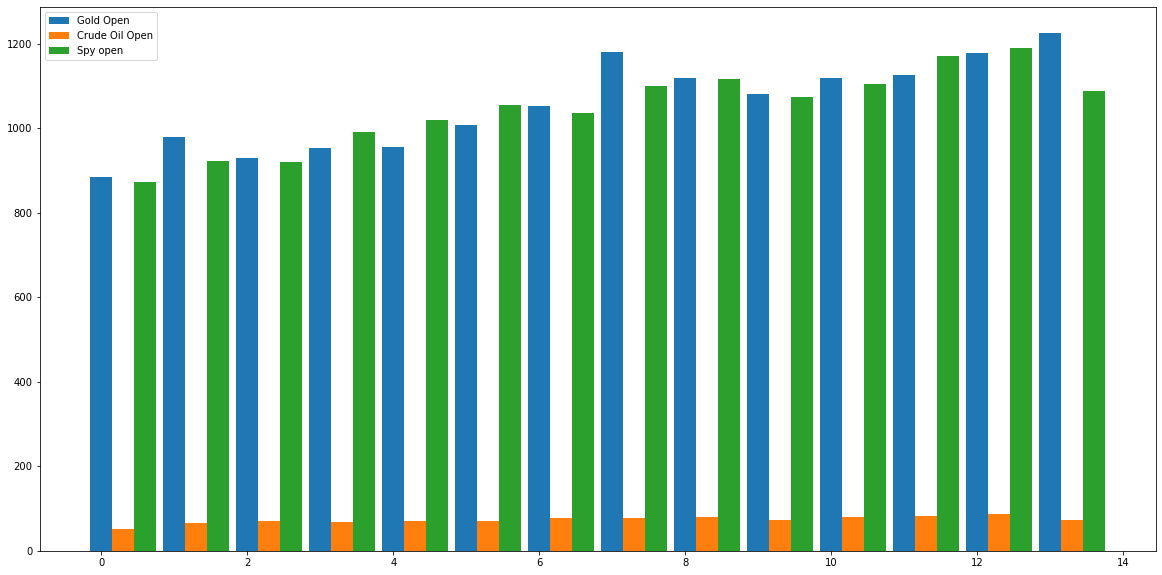

In [39]:

label_location = np.arange(Flu_Gold.shape[0])
plt.figure(figsize = (20,10))
plt.bar(label_location, Flu_Gold['Open'],width = 0.3, label = 'Gold Open')
plt.bar(label_location + 0.3, Flu_clf['Open'],width = 0.3, label = 'Crude Oil Open')
plt.bar(label_location +0.6, Flu_spy['Open'], width = 0.3,label = 'Spy open')

plt.legend();

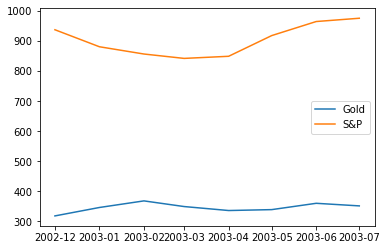

In [40]:
# Line graph SARS
plt.plot(SARS_gold['Date'], SARS_gold['Open'], label="Gold Open")
# plt.plot(SARS_clf['Date'], SARS_clf['Open'], label="Crude Oil Open")
plt.plot(SARS_spy['Date'], SARS_spy['Open'], label="S&P Open")
plt.legend();

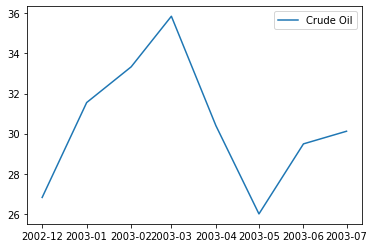

In [41]:
plt.plot(SARS_clf['Date'], SARS_clf['Open'], label="Crude Oil")
plt.legend();

In [42]:
# Individual Line graph's for SARS

# plt.plot(SARS_gold['Date'], SARS_spy['Open']);
# plt.plot(SARS_clf['Date'], SARS_spy['Open']);
# plt.plot(SARS_spy['Date'], SARS_spy['Open']);

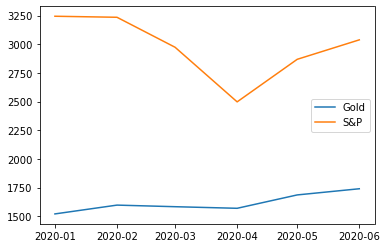

In [43]:
# Line graph SARS
plt.plot(COV19_gold['Date'], COV19_gold['Open'], label="Gold")
# plt.plot(COV19_clf['Date'], COV19_clf['Open'], label="Crude Oil")
plt.plot(COV19_spy['Date'], COV19_spy['Open'], label="S&P")
plt.legend();

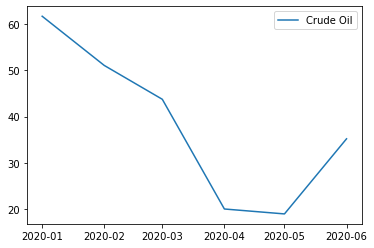

In [44]:
plt.plot(COV19_clf['Date'], COV19_clf['Open'], label="Crude Oil")
plt.legend();

In [45]:
# plt.plot(COV19_gold['Date'], COV19_gold['Open']);
# plt.plot(COV19_clf['Date'], COV19_clf['Open']);
# plt.plot(COV19_spy['Date'], COV19_spy['Open']);

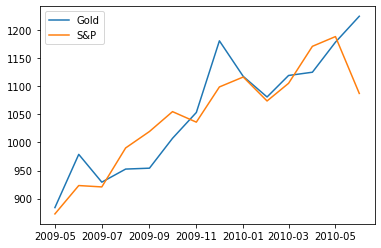

In [46]:
plt.plot(Flu_Gold['Date'], Flu_Gold['Open'], label="Gold")
# plt.plot(Flu_clf['Date'], Flu_clf['Open'], label="Crude Oil")
plt.plot(Flu_spy['Date'], Flu_spy['Open'], label="S&P")
plt.legend();

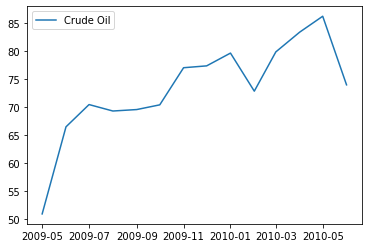

In [47]:
plt.plot(Flu_clf['Date'], Flu_clf['Open'], label="Crude Oil")
plt.legend();